In [ ]:
# Import required libraries
from __future__ import print_function

import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load dataset
#We will use the Olivetti Faces dataset. It has 10 faces each of 40 persons as 64x64 images.

# Get Olivetti Faces dataset
faces_data = fetch_olivetti_faces()

In [ ]:
n_samples, height, width = faces_data.images.shape
X = faces_data.data
n_features = X.shape[1]
y = faces_data.target
n_classes = int(max(y)+1)

print("Number of samples: {}, \nHeight of each image: {}, \nWidth of each image: {}, \nNumber of input features: {},\nNumber of output classes: {}\n".format(n_samples,height,
                                        width,n_features,n_classes))

Number of samples: 400, 
Height of each image: 64, 
Width of each image: 64, 
Number of input features: 4096,
Number of output classes: 40



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Shuffle the data randomly and make train and test splits
# Split into a training set (75%) and a test set (25%) 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

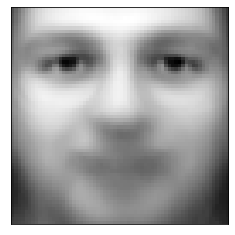

In [ ]:
mean_image = np.mean(X_train,axis=0)
plt.figure
plt.imshow(mean_image.reshape((64,64)), cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
# Make a function for visualization of the images as an album
def plot_gallery(images, h, w, titles=None, n_row=3, n_col=4):
    """
    Helper function to plot a gallery of portraits
    Taken from: http://scikit-learn.org/stable/auto_examples/applications/face_recognition.html
    """
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        if titles != None:
            plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

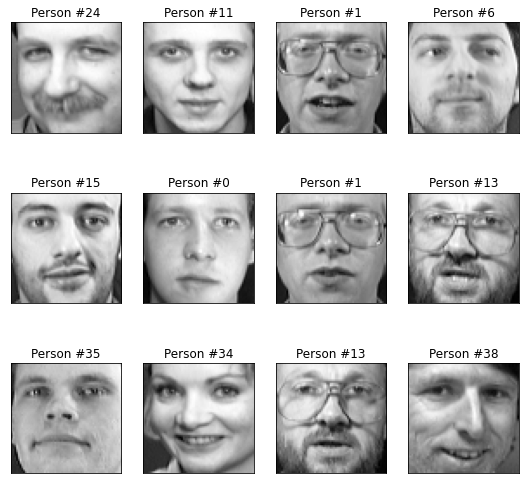

In [ ]:
# Visualize some faces from the training set
chosen_images = X_train[:12]
chosen_labels = y_train[:12]
titles = ['Person #'+str(i) for i in chosen_labels]

plot_gallery(chosen_images, height, width, titles)

In [ ]:

# Calculate a set of eigen-faces
''' We find the eigen vectors corresponding to the biggest eigen values of the covariance matrix of the data. 
These eigen vectors are the directions along which the data shows maximum amount of variation. 
Each eigen vector can be considered as an eigen face. 
We can represent any image in the dataset as a linear combination of these eigen faces with minimum error.'''

#Reduce the dimensionality of the feature space
n_components = 150

#Finding the top n_components principal components in the data
pca = PCA(n_components=n_components, whiten=True).fit(X_train)

#Find the eigen-vectors of the feature space
eigenfaces = pca.components_.reshape((n_components, height, width))

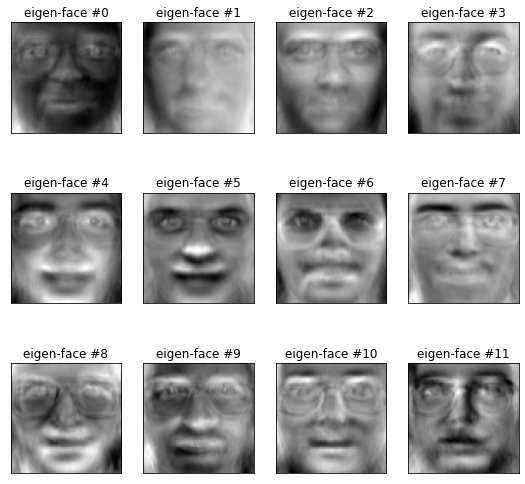

In [ ]:
# Visualize the eigen faces

titles = ['eigen-face #'+str(i) for i in range(12)]
plot_gallery(eigenfaces, height, width, titles)

In [ ]:
# Transform the data to the vector space spanned by the eigen faces
# Projecting the data onto the eigenspace
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("Current shape of input data matrix: ", X_train_pca.shape)

Current shape of input data matrix:  (300, 150)


(167, 302, 3)


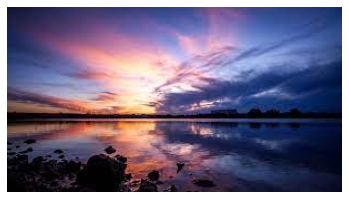

In [ ]:
# Compressing one Image
import matplotlib.image as mpimg 
from sklearn.decomposition import PCA
img = mpimg.imread('/content/drive/MyDrive/Datasets/fda10.jfif') 
#Now, let's look at the size of this numpy array object img as well as plot it using imshow. 
print ("Original Image shape: "img.shape)
plt.axis('off') 
plt.imshow(img) 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Okay, so the array has 800 rows each of pixel 1200x3. Let's reshape it into a format that PCA can understand. # 3600 = 1200 * 3 
img_r = np.reshape(img, (167, 906)) 
print ("Reshaped image: ",img_r.shape)


Reshaped image:  (167, 906)


In [ ]:
# Great, now lets run RandomizedPCA with 64 components (8x8 pixels) and transform the image. 
ipca = PCA(167).fit(img_r) 
img_c = ipca.transform(img_r) 
print ("Transformed image shape: ",img_c.shape) 
print ("IPCA variance ratio =",np.sum(ipca.explained_variance_ratio_))

Transformed image shape:  (167, 167)
IPCA variance ratio = 1.0


In [ ]:
#OK, now to visualize how PCA has performed this compression, let's inverse transform the PCA output and #reshape for visualization using imshow. 
temp = ipca.inverse_transform(img_c) 
#reshaping 2988 back to the original 1200 * 3 
temp = np.reshape(temp, (167,302,3)) 


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


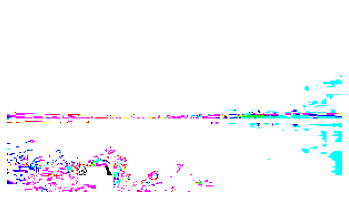

In [ ]:
#Great, now lets visualize like before with imshow 
plt.axis('off')
plt.imshow(temp)